<a href="https://colab.research.google.com/github/Shrisha1/Learning-Tensorflow/blob/master/id3UsingAPI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import sklearn
from id3 import Id3Estimator 
from id3 import export_graphviz
import io
from sklearn import preprocessing
from sklearn import metrics
import pydot 


In [2]:
from google.colab import files
uploaded = files.upload()

Saving id3.csv to id3.csv


In [0]:
df = pd.read_csv(io.BytesIO(uploaded['id3.csv']))

In [0]:
col_names = ['Outlook', 'Temperature', 'Humidity', 'Wind']
X=df[col_names]
Y=df['Answer']

#data=np.asarray(X)
#label=np.asarray(Y)

In [0]:
le = preprocessing.LabelEncoder()
data = X.apply(le.fit_transform)

#for i in range(len(col_names)):
    #data[:,i] = le.fit_transform(data[:,i])

In [152]:
data

,Outlook,Temperature,Humidity,Wind
0,2,1,0,1
1,2,1,0,0
2,0,1,0,1
3,1,2,0,1
4,1,0,1,1
5,1,0,1,0
6,0,0,1,0
7,2,2,0,1
8,2,0,1,1
9,1,2,1,1


In [153]:
id3tree1=Id3Estimator()
id3tree1.fit(data,label)
y_pred=id3tree1.predict(data)
print("Accuracy:",metrics.accuracy_score(label, y_pred)) 
export_graphviz(id3tree1.tree_,'tree.dot',feature_names=col_names)

Accuracy: 0.9285714285714286


<_io.TextIOWrapper name='tree.dot' mode='w' encoding='utf8'>

In [154]:
 %%shell
 dot -Tpng tree.dot -o tree1.png

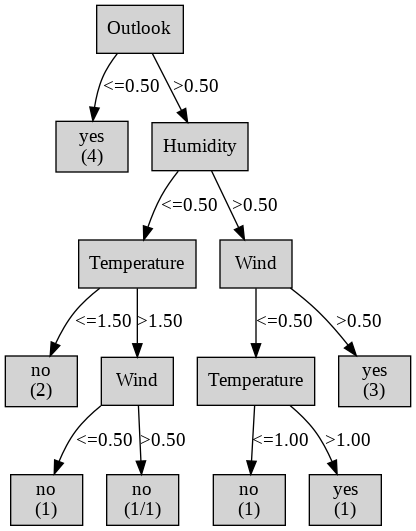

In [155]:
from IPython.display import Image
Image("tree1.png") 